In [1]:
# dict_ = {"n_neighbors": np.arange(1,200),
#         "weights" : ['uniform', 'distance'],
#         "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#         "leaf_size" : np.arange(1,10)}

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
%config Completer.use_jedi = False

In [5]:
'assists', 'baronKills', 'bountyLevel', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken', 'neutralMinionsKilled', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'perks', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'quadraKills', 'riotIdName', 'riotIdTagline', 'role', 'sightWardsBoughtInGame', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'timeCCingOthers', 'timePlayed', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal', 'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt', 'totalTimeSpentDead', 'totalUnitsHealed', 'tripleKills', 'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken', 'turretKills', 'turretTakedowns', 'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'win'

('assists',
 'baronKills',
 'bountyLevel',
 'challenges',
 'champExperience',
 'champLevel',
 'championId',
 'championName',
 'championTransform',
 'consumablesPurchased',
 'damageDealtToBuildings',
 'damageDealtToObjectives',
 'damageDealtToTurrets',
 'damageSelfMitigated',
 'deaths',
 'detectorWardsPlaced',
 'doubleKills',
 'dragonKills',
 'firstBloodAssist',
 'firstBloodKill',
 'firstTowerAssist',
 'firstTowerKill',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'goldEarned',
 'goldSpent',
 'individualPosition',
 'inhibitorKills',
 'inhibitorTakedowns',
 'inhibitorsLost',
 'item0',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'itemsPurchased',
 'killingSprees',
 'kills',
 'lane',
 'largestCriticalStrike',
 'largestKillingSpree',
 'largestMultiKill',
 'longestTimeSpentLiving',
 'magicDamageDealt',
 'magicDamageDealtToChampions',
 'magicDamageTaken',
 'neutralMinionsKilled',
 'nexusKills',
 'nexusLost',
 'nexusTakedowns',
 'objectivesStolen',
 'objectivesStole

In [6]:
'damageDealtToObjectives'
'damageDealtToTurrets'
'detectorWardsPlaced'
'sightWardsBoughtInGame'
'totalDamageDealt'
'totalDamageDealtToChampions'
'totalTimeSpentDead'
'visionScore'
'visionWardsBoughtInGame'

'visionWardsBoughtInGame'

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'arquivo_gabi.csv',
 'arrumando_colunas_do_dataset_lol_23_06.ipynb',
 'BOTH_FEATURES tentativa2.ipynb',
 'BOTH_FEATURES.ipynb',
 'coisas_gabi.ipynb',
 'Coisas_lol_ate_15_06.ipynb',
 'Collect_mastery_points.ipynb',
 'CSV data to dataset-kda.ipynb',
 'CSV data to dataset.ipynb',
 'CS_min.ipynb',
 'datasets',
 'desktop.ini',
 'entrega_28_06.ipynb',
 'Experimentos 17_05 ML.ipynb',
 'Experimentos 27_05 ML.ipynb',
 'Experimentos 31_05 ML.ipynb',
 'experimentos_entrega_28_06-cheating.ipynb',
 'experimentos_entrega_28_06_not_cheating.ipynb',
 'Extracting data from CSVs (1).ipynb',
 "extracting_players'_actual_role.ipynb",
 'kda.ipynb',
 'pick_rate_by_champ.csv',
 'Projeto matéria ML.ipynb',
 'Template_jupyter (1).ipynb',
 'teste com exps de 27_05 p checar se o novo dataset produz os mesmos resultados.ipynb',
 'Teste lol 07_06.ipynb',
 'Teste.ipynb',
 'textoo']

In [8]:
os.chdir('datasets')

In [9]:
os.getcwd()

'C:\\Users\\gmbas\\Downloads\\Files_lol_project\\datasets'

In [10]:
os.listdir()

["'df_blue_and_red_23_06'",
 '932_matches_23_06.csv',
 '932_matches_com_g_truth_final',
 '932_matches_df_21_06',
 'BOTHPARCIAL',
 'catboost_info',
 'df_blue_23_06',
 'df_cheating_positions_870_matches_28_06.csv',
 'df_correto_20features_839partidas_sem_erro',
 'df_finalll_23_06',
 'df_final_provisorio',
 'df_NOT_cheating_positions_870_matches_28_06.csv',
 'df_red_23_06',
 'finallllllcomtarget']

In [11]:
path = os.getcwd()
path += '\\' + '932_matches_df_21_06'

In [12]:
df = pd.read_csv(path)
df

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [13]:
path2 = os.getcwd()
path2 += '\\' + '932_matches_df_23_06'

In [14]:
df.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [15]:
df = df.drop('Unnamed: 0',axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [16]:
df.describe()

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
count,930.000000,930.000000,929.000000,931.000000,925.000000,929.000000,925.000000,928.000000,930.000000,930.000000,...,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.310000e+02,9.320000e+02,9.310000e+02,932.000000
mean,2.320735,4.326158,5.093312,5.613585,6.192726,2.286115,4.332022,5.092469,5.575839,6.158986,...,1.306600e+05,1.623711e+05,1.329357e+05,1.426377e+05,1.385373e+05,1.575460e+05,1.543281e+05,1.225023e+05,1.512995e+05,0.511803
std,1.345618,1.046924,0.728148,0.684881,0.712494,1.347358,1.048521,0.790688,0.759589,0.774417,...,2.879916e+05,3.198089e+05,2.202419e+05,2.408412e+05,3.421142e+05,4.604155e+05,2.967424e+05,2.152448e+05,2.608054e+05,0.500129
min,0.003120,0.775052,1.442221,1.398153,4.070783,0.000619,0.469951,1.634657,0.517667,1.171021,...,1.330000e+02,2.080000e+02,1.120000e+02,1.520000e+02,1.110000e+02,1.150000e+02,1.450000e+02,1.170000e+02,1.160000e+02,0.000000
25%,1.216618,3.761332,4.705098,5.209627,5.716779,1.215304,3.713026,4.576966,5.120948,5.667095,...,1.287400e+04,1.765850e+04,1.979950e+04,1.650225e+04,1.232150e+04,1.302925e+04,1.463550e+04,1.699400e+04,1.863300e+04,0.000000
50%,2.063810,4.493776,5.140820,5.617671,6.150020,1.924334,4.492687,5.148187,5.608918,6.163025,...,3.669450e+04,5.676350e+04,5.571600e+04,5.659550e+04,3.828650e+04,3.934550e+04,4.659300e+04,5.204900e+04,5.426800e+04,1.000000
75%,3.351040,5.042961,5.590857,6.029303,6.639591,3.290608,5.051549,5.655599,6.084925,6.671387,...,1.210462e+05,1.661932e+05,1.417968e+05,1.668195e+05,1.172900e+05,1.228195e+05,1.563725e+05,1.335562e+05,1.779175e+05,1.000000
max,6.299134,6.776709,7.107505,8.151535,8.655552,7.798711,7.006311,7.279754,8.058324,8.437891,...,3.460805e+06,3.263209e+06,2.974271e+06,2.234451e+06,6.850851e+06,8.835268e+06,3.916739e+06,2.974271e+06,2.928283e+06,1.000000


In [17]:
df.shape

(932, 31)

In [18]:
df = df.dropna()
df.shape

(907, 31)

In [19]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [20]:
X.shape

(907, 30)

In [21]:
y.shape

(907,)

In [22]:
# cutoff1 = round(X.shape[0]*0.6)
# cutoff2 = round(X.shape[0]*0.8)
# X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
# y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [23]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X,X_test = X[0:cutoff2],X[cutoff2:]
y,y_test = y[0:cutoff2],y[cutoff2:]

In [24]:
#Check if dimensions are correct
X_test

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red
746,1.084383,4.624573,5.914023,6.037218,6.354692,4.406390,6.373533,7.279754,7.514262,8.165916,...,2033862,62739,25572,281557,258444,676165,30768,12855.0,484790,111991.0
747,3.403758,5.268502,5.556591,6.039454,6.809669,2.203353,4.415965,4.962228,5.578384,5.682121,...,59137,11553,45829,170681,29788,71143,25516,55481.0,42962,1152.0
748,0.999617,3.668755,3.852909,4.028316,4.077901,0.548827,3.925144,5.611898,5.662434,5.715688,...,78768,31812,9959,169339,159253,3729,127877,23849.0,7159,46770.0
750,3.150954,3.418479,5.310003,5.571583,5.910385,3.138102,4.850867,5.169398,5.330201,5.632886,...,237643,54637,249846,134184,8845,1616586,50159,32024.0,44256,2505.0
751,4.584527,5.584366,5.585449,5.760780,6.106415,1.521183,5.424159,6.012728,6.894918,7.901919,...,322096,31428,55086,1302,22332,11827,35548,5075.0,137585,67968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,8771,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0
928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,18754,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0
929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,10958,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0
930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,381589,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0


In [25]:
#s_scaler = StandardScaler()

In [26]:
#s_scaler.fit(X_train)

In [27]:
#X_val.describe()

In [28]:
# X_train = s_scaler.transform(X_train)
# X_val = s_scaler.transform(X_val)
# X_test = s_scaler.transform(X_test)

In [29]:
log_reg = LogisticRegression()

In [30]:
log_reg.fit(X,y)

LogisticRegression()

In [31]:
#train score
log_reg.score(X,y)

0.5647382920110193

In [32]:
#test score
log_reg.score(X_test,y_test)

0.5027624309392266

In [33]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [34]:
y_test.shape

(181,)

In [35]:
y_pred_prob.shape

(181,)

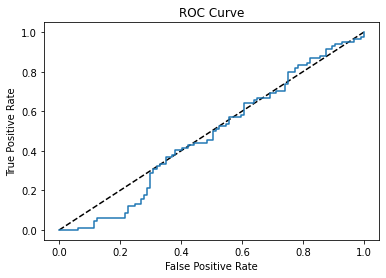

In [36]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [37]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.47496318114874814

**KNN**

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X,y)

KNeighborsClassifier()

In [40]:
knn.score(X,y)

0.6515151515151515

In [41]:
knn.score(X_test,y_test)

0.5082872928176796

In [42]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

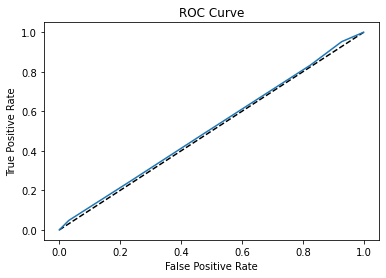

In [43]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [44]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.5125184094256259

In [49]:
y_pred = knn.predict(X_test)

In [51]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

array([[52, 45],
       [44, 40]], dtype=int64)

<AxesSubplot:title={'center':'Matriz de confusão'}>

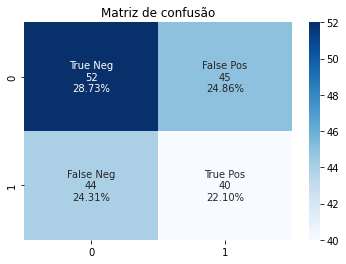

In [52]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [53]:
RF = RandomForestClassifier()

In [54]:
RF.fit(X,y)

RandomForestClassifier()

In [55]:
RF.score(X,y)

1.0

In [56]:
RF.score(X_test,y_test)

0.5248618784530387

In [57]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

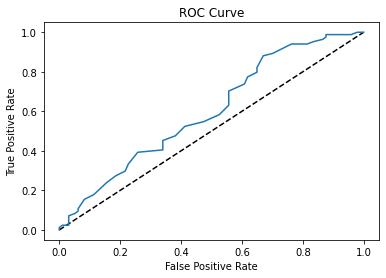

In [58]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
roc_auc_score(y_test,y_pred_prob)

0.6005768286696123

# **Optimizing Hyperparameters**

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [64]:
from sklearn.model_selection import TimeSeriesSplit

In [65]:
tscv = TimeSeriesSplit()

In [66]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x00000240D28E33E0>

In [67]:
for train_index, val_index in tscv.split(X):
    print(f"train = {train_index},val_index = {val_index}")

train = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120],val_index = [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 2

In [68]:
# versão modificada leave one out CV
# n_samples = 10

# Train      Test

# 1           10
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9



# Train      Test

# 1           9
# 2
# 3
# 4
# 5
# 6
# 7
# 8


# Train      Test

# 1           8
# 2
# 3
# 4
# 5
# 6
# 7



In [69]:
train_scores = []
val_scores = []
hyper_params = []
#n_estimators,max_features
for max_depth_ in np.arange(1,100):
    for n_estimators_ in np.arange(10,110,10):
        for max_features_ in (None,"sqrt"):
            train_ = []
            val_ = []
            for train_index, val_index in tscv.split(X):
                #X = pd.DataFrame(X.iloc[train_index,:])
                #print("TRAIN:", train_index, "TEST:", test_index)
                rf = RandomForestClassifier(n_estimators=n_estimators_, 
                                            max_depth=max_depth_, 
                                            max_features=max_features_,
                                            random_state=42)
                #print(train_index,np.shape)
                X_train2, X_val2 = X.iloc[train_index,:], X.iloc[val_index,:]
                y_train2, y_val2 = y.iloc[train_index], y.iloc[val_index]
                rf.fit(X_train2,y_train2)
            #     y_train_pred = rf.predict(X_train2)
            #     y_val_pred = rf.predict(X_val2)
                train_.append(rf.score(X_train2,y_train2))
                val_.append(rf.score(X_val2,y_val2))
                
            train_scores.append(train_)    
            val_scores.append(val_)
            hyper_params.append((max_depth_,n_estimators_,max_features_))
            print(f"train mean = {np.mean(np.array(train_))},val mean = {np.mean(np.array(val_))}")




train mean = 0.6428650137741047,val mean = 0.5305785123966943
train mean = 0.627107438016529,val mean = 0.5256198347107438
train mean = 0.6553994490358127,val mean = 0.5041322314049588
train mean = 0.6448760330578513,val mean = 0.5223140495867769
train mean = 0.6638292011019284,val mean = 0.5190082644628099
train mean = 0.6414600550964188,val mean = 0.515702479338843
train mean = 0.6599173553719009,val mean = 0.5223140495867769
train mean = 0.6502203856749311,val mean = 0.5024793388429752
train mean = 0.6616804407713499,val mean = 0.5256198347107438
train mean = 0.6510192837465565,val mean = 0.512396694214876
train mean = 0.6606611570247933,val mean = 0.5305785123966942
train mean = 0.6566391184573004,val mean = 0.5090909090909091
train mean = 0.6653443526170799,val mean = 0.5239669421487603
train mean = 0.6576308539944904,val mean = 0.5057851239669422
train mean = 0.6653443526170799,val mean = 0.5256198347107438
train mean = 0.6589531680440771,val mean = 0.5074380165289256
train mean 

train mean = 0.9877685950413223,val mean = 0.5619834710743802
train mean = 0.9939393939393941,val mean = 0.5388429752066115
train mean = 0.9868870523415978,val mean = 0.5504132231404959
train mean = 0.994077134986226,val mean = 0.5223140495867769
train mean = 0.9895592286501376,val mean = 0.5487603305785124
train mean = 0.9951515151515153,val mean = 0.5371900826446281
train mean = 0.9898898071625345,val mean = 0.5553719008264463
train mean = 0.9596694214876033,val mean = 0.543801652892562
train mean = 0.9525344352617079,val mean = 0.578512396694215
train mean = 0.987107438016529,val mean = 0.5438016528925619
train mean = 0.9792837465564738,val mean = 0.540495867768595
train mean = 0.992589531680441,val mean = 0.5322314049586776
train mean = 0.9895316804407713,val mean = 0.5355371900826447
train mean = 0.9968870523415978,val mean = 0.5421487603305785
train mean = 0.9934710743801652,val mean = 0.5454545454545454
train mean = 0.9973829201101928,val mean = 0.5322314049586778
train mean = 0

train mean = 0.9961707988980717,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5702479338842975
train mean = 0.9983471074380166,val mean = 0.5305785123966942
train mean = 1.0,val mean = 0.5487603305785124
train mean = 1.0,val mean = 0.5305785123966943
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5421487603305786
train mean = 1.0,val mean = 0.5636363636363637
train mean = 1.0,val mean = 0.5338842975206611
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264462
train mean = 1.0,val mean = 0.5371900826446281
train mean = 1.0,val mean = 0.5636363636363636
train mean = 1.0,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.543801652892562
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5487603305785124
train mean = 0.9770523415977962,val mean = 0.5322314049586776
train mean = 0.9737741046831955,val mean = 0.5603

train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.561983

train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.552066

train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.543801

train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.555371

train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.545454

train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.538842

train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.533884

train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.535537

train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.532231

train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5553719008264463
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5454545454545455
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5388429752066115
train mean = 1.0,val mean = 0.5421487603305785
train mean = 1.0,val mean = 0.5305785123966943
train mean = 0.9772727272727273,val mean = 0.5338842975206611
train mean = 0.974435261707989,val mean = 0.5603305785123968
train mean = 0.9965013774104683,val mean = 0.5355371900826447
train mean = 0.9976859504132232,val mean = 0.5619834710743803
train mean = 0.9983471074380166,val mean = 0.5322314049586776
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.550413

In [70]:
mean_arr_val = []
for arr in val_scores:
    mean_arr_val.append(np.mean(arr))
print(max(mean_arr_val))

0.5834710743801652


In [71]:
len(val_scores)

1980

In [72]:
arr2 = np.array(mean_arr_val)
arr2#[mean_arr_val == 0.5867768595041324]

array([0.53057851, 0.52561983, 0.50413223, ..., 0.53884298, 0.54214876,
       0.53057851])

In [73]:
arr2[arr2 > 0.58]

array([0.58347107])

In [106]:
np.where(arr2 > 0.58)

(array([255], dtype=int64),)

In [107]:
hyper_params[255]

(13, 80, 'sqrt')

In [76]:
hyper_params[250]

(13, 60, None)

In [77]:
RF2 = RandomForestClassifier(n_estimators=20,
                             max_depth = 7,
                             max_features = None,
                             random_state = 42)

In [78]:
RF2.fit(X,y)

RandomForestClassifier(max_depth=7, max_features=None, n_estimators=20,
                       random_state=42)

In [79]:
#train_score
RF2.score(X,y)

0.9462809917355371

In [80]:
#test_score
RF2.score(X_test,y_test)

0.6077348066298343

In [81]:
def range_splitter(n_samples,iterations):
    both_indexes = []
    for i in range(iterations):
        test_index = n_samples -  i - 1
        train_index_list = np.arange(0,test_index)
        test_index_list = np.array([test_index])
        both_indexes.append([train_index_list,test_index_list])
    return both_indexes

In [82]:
range_splitter(8,5)

[[array([0, 1, 2, 3, 4, 5, 6]), array([7])],
 [array([0, 1, 2, 3, 4, 5]), array([6])],
 [array([0, 1, 2, 3, 4]), array([5])],
 [array([0, 1, 2, 3]), array([4])],
 [array([0, 1, 2]), array([3])]]

In [83]:
#n_estimators,max_features

In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = , 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

SyntaxError: invalid syntax (3404147272.py, line 10)

In [ ]:
# train_scores = []
# val_scores = []

# for train_index, val_index in tscv.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     #print(type(train_index))
#     rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto',random_state=42)
#     train_index_list = list(train_index)
#     val_index_list = list(val_index)
#     X_train2, X_val2 = X[train_index_list[0]:train_index_list[-1]], X[val_index_list[0]:val_index_list[-1]]
#     y_train2, y_val2 = y[train_index_list[0]:train_index_list[-1]], y[val_index_list[0]:val_index_list[-1]]
#     rf.fit(X_train2,y_train2)
# #     y_train_pred = rf.predict(X_train2)
# #     y_val_pred = rf.predict(X_val2)
#     train_scores.append(rf.score(X_train2,y_train2))
#     val_scores.append(rf.score(X_val2,y_val2))

# print(f"train mean = {np.mean(np.array(train_scores))},test mean = {np.mean(np.array(val_scores))}")



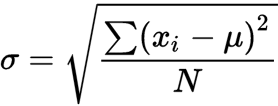

In [85]:
def acc_std_dev(mean_acc, N, y_pred, y_true):
    '''
    mean_acc: number from 0 to 1 that is the fraction of accurate predicts of the model given X_test as input
    N: number of lines in y_test
    y_pred: predicts done by the model given X_test as input
    y_true: It's y_test
    
    '''
    sum_ = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            y_i = 1
        else:
            y_i = 0
            
        sum_ += (y_i - mean_acc)**2
        
    std_dev = np.sqrt(sum_/(N-1))
    
    avg_std_dev = std_dev/np.sqrt(N)
    
    return avg_std_dev

In [94]:
y_pred = RF2.predict(X_test)
acc = RF2.score(X_test,y_test)
N = y_test.shape[0]
y_test = np.array(y_test)

In [98]:
acc

0.6077348066298343

In [102]:
acc_std_dev(acc,N, y_pred, y_test)

0.03639239934690513